<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/TidyDataconcatStarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

**Always start with imports**

In [ ]:
# These will be your typical imports for just about any pandas project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [ ]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [ ]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [ ]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3 = pd.concat([df1, df2], axis=0)
df3.reset_index()

,index,letter,number
0,0,a,1
1,1,b,2
2,0,c,3
3,1,d,4


In [ ]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4 = pd.concat([df1, df2], axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [ ]:
# stock names
stocks_dict = {'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']}
stocknames = pd.DataFrame(stocks_dict)
stocknames

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [ ]:
# stock prices.
prices_dict = {'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]}
stockprices = pd.DataFrame(prices_dict)
stockprices

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [ ]:
# Merge these dataframes.
named_stocks = pd.merge(stockprices, stocknames)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [ ]:
# Create a 3rd dataset of weekly highs
high_dict = {'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]}
wkhigh = pd.DataFrame(high_dict)
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [ ]:
# Now merge that with the named stocks.
# full_stocks=pd.merge(named_stocks, wkhigh, how='inner')
# full_stocks=pd.merge(named_stocks, wkhigh, how='outer')
# full_stocks=pd.merge(named_stocks, wkhigh, how='left')
full_stocks=pd.merge(named_stocks, wkhigh, how='right', on='Symbol')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49
4,NFLX,NaN,NaN,303.22


The 'how' parameter indicates what the portion of the selected dataframes to keep after the merge takes place.  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [ ]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

### 1.3 Reshape: `melt` and `pivot_table`



Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham: 'wide' format vs. 'tidy' format**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [ ]:
# Let's create a simple table.

myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
    [[np.nan,2],
     [16,11],
     [3, 1]],
     index=myindex,
     columns=mycolumns
)

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [ ]:
# This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [ ]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [ ]:
# First, get the column names as a list.
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [ ]:
# Now get the index values as another list.
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [ ]:
# For table 1, convert the index into a column using the `reset_index` method.
table1=table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [ ]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy1 = table1.melt(id_vars = 'index',
                    value_vars = ['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [ ]:
# rename the columns
tidy1 = tidy1.rename(columns={'index': 'patientname', 
                              'variable': 'trt',
                              'value': 'result'})
tidy1

,patientname,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [ ]:
# shorten the `trt` values
tidy1['trt'] = tidy1['trt'].str.replace('treatment', '')
tidy1

,patientname,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [ ]:
##### LEAVE BLANK --an assignment exercise #####

**Tidy --> Table 1**

The `pivot_table` function is the inverse of `melt`.

In [ ]:
# Let's do it all in reverse.


**Tidy --> Table 2**

In [ ]:
##### LEAVE BLANK --an assignment exercise #####

**Seaborn example**

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

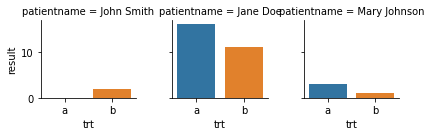

In [ ]:
# Plot this using seaborn
sns.catplot(data = tidy1,
            x = 'trt',
            y = 'result',
            col = 'patientname',
            kind = 'bar',
            height = 2);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [ ]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [ ]:
# Let's take a look at the first quarter.


In [ ]:
# how about the second quarter?


In [ ]:
# Do they have exactly the same columns?


In [ ]:
# Let's define a function to check if they're REALLY equal.


In [ ]:
# Now we're sure they're equal, let's concatenate them.


In [ ]:
# Confirm that did what we wanted it to.


In [ ]:
# Now add quarters 3 and 4, as well.


### 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [ ]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [ ]:
# Read that into Pandas, and check out 5 rows.


In [ ]:
# What are all the columns?


In [ ]:
# Let's restrict that to just a few columns, for a simple analysis about commute times


In [ ]:
# What's the average commute in the USA?


In [ ]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [ ]:
# Take a look at that new data.


In [ ]:
# What are those RUCC codes all about?


In [ ]:
# Let's shrink that USDA data to just the columns we need.


In [ ]:
# Let's merge that with our census data about commute times.


In [ ]:
# Is there any difference in commutes by rural-urban designation?


In [ ]:
# Display that using the Pandas plotting function.


## Part 3. Real-word Examples

### 3.1. Instacart  Dataset: `pd.concat` and `pd.merge`

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [ ]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-14 01:36:36--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.200.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.200.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  67.2MB/s    in 2.9s    

2020-07-14 01:36:39 (67.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [ ]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [ ]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).


In [ ]:
# bash command: list the contents of that folder.


**Goal: Reproduce this example**

The first two orders for user id 1:

In [ ]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

#### Load data

Here's a list of all six CSV filenames

In [ ]:
# List the contents of the cwd.


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [ ]:
# Read in the aisles dataset. Do we need anything from here? No, we don't.


In [ ]:
# Read in the departments dataset. Do we need anything from here? Nope.


In [ ]:
# How about order_products? We need everything from this table except for reordered.


In [ ]:
# How is this differen from the previous one? Same as above.
# This file indicates a user's most recent order.
# the suffix '__train' vs '__prior' indicates it's been split for machine learning (train-test split)
# Given a user's order history, can you predict what they'll order next.


In [ ]:
# How is this one different? Does it have anything we need?
# We need most of these columns, except 'days_since_prior_order' and 'eval_set'


In [ ]:
# And products? We need 'product_name' and 'product_id'


In [ ]:
display(example)

#### Filtering: Get a subset of orders

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [ ]:
# let's look at the `orders` dataframe.


In [ ]:
# let's filter this dataframe to just the columns we need.
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']

In [ ]:
# Now let's filter it to only certain rows. This will result in a series of boolean values.


In [ ]:
# Apply that condition to the orders dataframe.


In [ ]:
# a more complicated condition.


In [ ]:
# Turn that filtered dataframe into its own dataframe.


#### Concatenate order_products__prior and order_products__train

In [ ]:
# check out their shape.


In [ ]:
# concatenate them together


In [ ]:
# Get a subset of `order_products` -- slim down this large dataset to only what I need (only 2 orders). 


In [ ]:
# Make a selection of columns


In [ ]:
# Use the .loc method to filter rows and columns in a single blow.


#### Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [ ]:
# Both of these subsets are now quite small


In [ ]:
# what is their common key ('unique identifier')?


In [ ]:
# merge the two df's on the common key.
# the 'on' parameter indicates a specific column that is contained in both dataframes.
# we use it to look up and copy information from the two df's into a combined df.


Merge with columns from `products`

In [ ]:
# Merge with columns from products using `pd.merge`


In [ ]:
# are we there yet?
display(example)

### 3.2 Instacart Dataset: `melt` and `pivot_tables`

**Goal: Reproduce part of this example**

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [ ]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

In [ ]:
# Read back in the datasets in their original form (no filters).


####Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [ ]:
# We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [ ]:
# Subset the products dataframe to only those two.


In [ ]:
# I need to associate the hour of the day with a specific product.
# There's no common key between the `products` and `orders` df's to merge them.
# But `order_products` allows me to join them (aka, the `join` table.)


In [ ]:
# Subset all of that one more time.


#### 4 ways to reshape and plot

**1. value_counts**

In [ ]:
# How many orders included cream, in total and at each hour of the day?


In [ ]:
# Display that as percents rather than counts


In [ ]:
# Display that in a plot using Panda's built-in graphics library


In [ ]:
# Display products both together.


**2. crosstab**

In [ ]:
# You can get the same result using the `pd.crosstab` method
# But it generates a legend and requires fewer steps


**3. Pivot Table**

In [ ]:
# and again, but with the `pd.pivot_table` method


**4. melt**

In [ ]:
# Finally, what if we want to reshape the table?
# First, let's display it in `wide` format.


In [ ]:
# Now let's convert from wide to tidy format.
columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }
